<center>
    <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce">
        <img src="https://storage.googleapis.com/kaggle-datasets-images/55151/105464/d59245a7014a35a35cc7f7b721de4dae/dataset-cover.png?t=2018-09-21-16-21-21" style="max-width: 300px; display: inline" alt="OpenClassrooms"/>
    </a>
</center>

<center>
    <span style="color:lightpurple; font-size: 24px; font-weight: bold;">
        PROJET DATA SCIENCE
    </span>
</center>
<br><br>
<center>
    <span style="color:black; font-size: 22px; font-weight: bold;">
        Segmenter des clients d'un site e-commerce
    </span>
</center>
<center>
    <span style="color:blue; font-size: 22px; font-weight: bold;">
        Notebook n°1 - Exploration
    </span>
</center>
<br><br>
<center>
    <span style="color:black; font-weight: bold;">
        Ambre ROBERT
    </span>
</center>
<br><br>

Olist est une entreprise brésilienne offrant une solution pour vendre sur les marketplaces en ligne.
Afin de mettre au point des campagnes de communication pertinentes, Olist souhaite comprendre les différents types d’utilisateurs de son site. 

Dans ce contexte, le projet suivant s'intéresse au comportement et aux données personnelles de ces utilisateurs. 
L'objectif est de fournir une segmentation des clients d’Olist destinée à l’équipe Marketing afin d’améliorer la communication de l’entreprise.

Ce notebook contientient toute la partie exploration des données. 

Pour avoir le notebook avec **toutes les sorties affichées** voir le fichier au format html.

**Librairies**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time

import scipy.stats as stats

**Style des graphiques**

In [2]:
sns.set(style="whitegrid")
background_color = '#2a2e3b'
title_size = 20
label_size = 14
text_color = 'white'

**Importation des données**

Données disponibles sur Kaggle : "Brazilian E-Commerce Public Dataset by Olist"
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [3]:
customers_data = pd.read_csv('./data/olist_customers_dataset.csv')
geolocation_data = pd.read_csv('./data/olist_geolocation_dataset.csv')
order_items_data = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('./data/olist_order_reviews_dataset.csv')
orders_data = pd.read_csv('./data/olist_orders_dataset.csv')
products_data = pd.read_csv('./data/olist_products_dataset.csv')
sellers_data = pd.read_csv('./data/olist_sellers_dataset.csv')
translation_data = pd.read_csv('./data/product_category_name_translation.csv')

# 1. Table des matières
- [2. Exploration des données](#2.-Exploration-des-données)
  - [2.1 Customers](#2.1-Customers)
  - [2.2 Geolocation](#2.2-Geolocation)
  - [2.3 Order items](#2.3-Order-items)
  - [2.4 Order payments](#2.4-Order-payments)
  - [2.5 Order reviews](#2.5-Order-reviews)
  - [2.6 Orders](#2.6-Orders)
  - [2.7 Products](#2.7-Products)
  - [2.8 Sellers](#2.8-Sellers)
- [3. Regroupement des données](#3.-Regroupement-des-données)
- [4. Analyse descriptive du jeu de données des utilisateurs](#4.-Analyse-descriptive-du-jeu-de-données-des-utilisateurs)

# 2. Exploration des données

## 2.1 Customers

In [4]:
customers_data

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [5]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


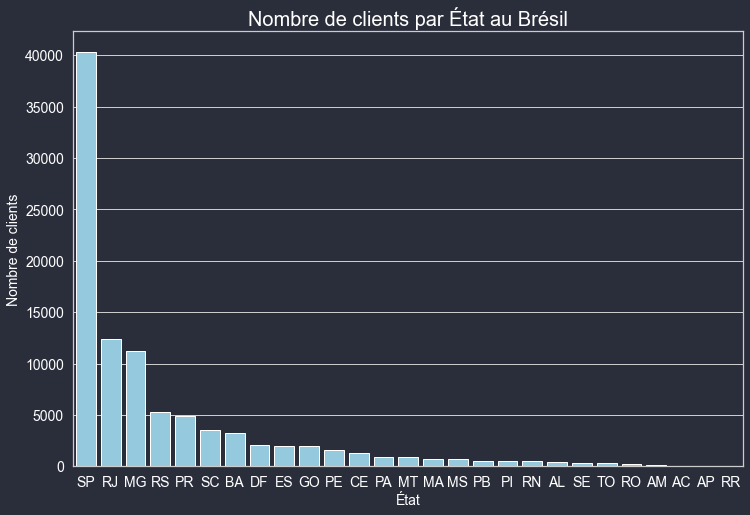

In [6]:
customers_state_loc = customers_data.groupby('customer_state')['customer_unique_id'].nunique().reset_index(name='nombre_de_clients_uniques')
customers_state_loc = customers_state_loc.sort_values(by='nombre_de_clients_uniques', ascending=False)

plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)
sns.barplot(data=customers_state_loc, x='customer_state', y='nombre_de_clients_uniques', color='skyblue')

plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('État', fontsize=label_size, color=text_color)
plt.ylabel('Nombre de clients', fontsize=label_size, color=text_color)
plt.title('Nombre de clients par État au Brésil', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

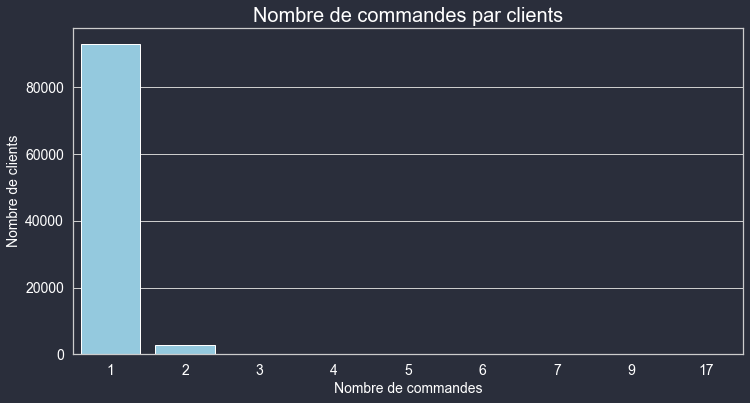

In [7]:
order_counts = customers_data.groupby('customer_unique_id')['customer_id'].count().reset_index()
order_counts.rename(columns={'customer_id': 'order_count'}, inplace=True)
order_counts_dist = order_counts['order_count'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)
sns.barplot(x=order_counts_dist.index, y=order_counts_dist.values, color='skyblue')

plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Nombre de commandes', fontsize=label_size, color=text_color)
plt.ylabel('Nombre de clients', fontsize=label_size, color=text_color)
plt.title('Nombre de commandes par clients', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

## 2.2 Geolocation

In [8]:
geolocation_data

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [9]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Vérification d'outliers**

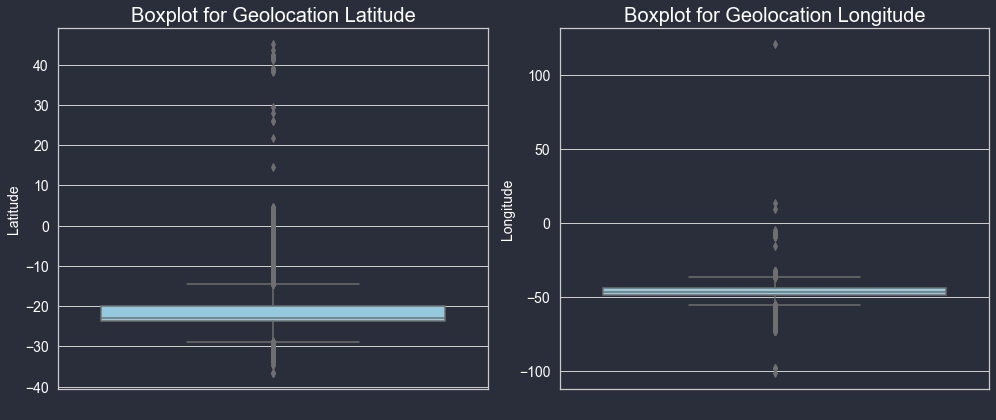

In [10]:
plt.figure(figsize=(14, 6))
plt.gcf().set_facecolor(background_color)

plt.subplot(1, 2, 1)
plt.gca().set_facecolor(background_color)
sns.boxplot(data=geolocation_data, y='geolocation_lat', color='skyblue')
plt.title('Boxplot for Geolocation Latitude', fontsize=title_size, color=text_color)
plt.ylabel('Latitude', fontsize=label_size, color=text_color)
plt.xlabel(' ', color=text_color)
plt.yticks(color=text_color, fontsize=label_size)

plt.subplot(1, 2, 2)
plt.gca().set_facecolor(background_color)
sns.boxplot(data=geolocation_data, y='geolocation_lng', color='skyblue')
plt.title('Boxplot for Geolocation Longitude', fontsize=title_size, color=text_color)
plt.ylabel('Longitude', fontsize=label_size, color=text_color)
plt.xlabel(' ', color=text_color)
plt.yticks(color=text_color, fontsize=label_size)

plt.tight_layout()
plt.show()

In [11]:
# Limites géographiques pour le Brésil
lat_min, lat_max = -33.736, 5.271
lng_min, lng_max = -73.982, -34.791

outliers = geolocation_data[
    ~((geolocation_data['geolocation_lat'].between(lat_min, lat_max)) &
      (geolocation_data['geolocation_lng'].between(lng_min, lng_max)))
]

map_center = [-14.2350, -51.9253]  # Coordonnées approximatives du centre du Brésil
m = folium.Map(location=map_center, zoom_start=3, control_scale=True)

for idx, row in outliers.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=4,                # Taille du point
        color='blue',            # Couleur du contour
        fill=True,
        fill_color='blue',       # Couleur de remplissage
        fill_opacity=0.7         # Opacité
    ).add_to(m)

m

In [12]:
outliers

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
387565                        18243        28.008978       -15.536867   
513631                        28165        41.614052        -8.411675   
513643                        28155       -34.586422       -58.732101   
513754                        28155        42.439286        13.820214   
514429                        28333        38.381672        -6.328200   
516682                        28595        43.684961        -7.411080   
538512                        29654        29.409252       -98.484121   
538557                        29654        21.657547      -101.466766   
585242                        35179        25.995203       -98.078544   
585260                        35179        25.995245       -98.078533   
695375                        45936       -34.622400       -58.901888   
695377                        45936        38.323939        -6.775035   
697048                        46560        38.991963        -4.947823   
698466                        47310        38.268205        -7.803886   
715892                        53990        -3.845491       -32.413367   
715893                        53990        -3.853092       -32.423525   
715896                        53990        -3.846930       -32.415821   
715900                        53990        -3.848319       -32.412384   
715908                        53990        -3.853092       -32.423525   
715911                        53990        -3.848319       -32.412384   
715912                        53990        -3.844080       -32.405985   
715913                        53990        -3.846930       -32.415821   
715914                        53990        -3.852505       -32.402779   
715915                        53990        -3.844080       -32.405985   
715916                        53990        -3.853092       -32.423525   
727755                        57319        45.065933         9.341528   
732362                        58441        41.385328        -8.717342   
769333                        68275        41.146203        -8.577855   
769351                        68275        42.166805        -6.898531   
769391                        68275        42.167251        -6.898559   
769436                        68275        42.167251        -6.898559   
769489                        68275        42.167251        -6.898559   
769924                        68379        38.713128        -9.135741   
770534                        68447        42.428884        -6.873344   
822529                        78131        38.816816        -9.394625   
860562                        83252        42.184003        -8.723762   
860832                        83252        42.184003        -8.723762   
865611                        83810        39.057629        -9.400037   
965687                        95130        14.585073       121.105394   
992584                        98780       -36.605374       -64.283946   
993075                        98780       -36.603837       -64.287433   
993302                        98780       -36.603837       -64.287433   

               geolocation_city geolocation_state  
387565  bom retiro da esperanca                SP  
513631      vila nova de campos                RJ  
513643              santa maria                RJ  
513754              santa maria                RJ  
514429                   raposo                RJ  
516682                  portela                RJ  
538512   santo antônio do canaã                ES  
538557   santo antonio do canaa                ES  
585242       santana do paraíso                MG  
585260       santana do paraiso                MG  
695375                  itabata                BA  
695377                 itabatan                BA  
697048                 ibiajara                BA  
698466       santana do sobrado                BA  
715892      fernando de noronha                PE  
715893      fernando de noronha     

In [13]:
outliers.shape

(42, 5)

Il semble y avoir 42 points géographiques qui ne sont pas localisés au Brésil. 

Après vérification il y a bien erreur de coordonnées pour 31 d'entres eux, les 11 autres sont bien au Brésil mais sur une île au large de l'Océan Atlantique (dans la ville "fernando de noronha"). 

Nous allons corriger les 31 lignes aux mauvaises coordonnées en se servant des variables "geolocation_city" et "geolocation_state".

In [14]:
errors = outliers[~outliers['geolocation_city'].str.contains("fernando de noronha", case=False, na=False)]
geolocator = Nominatim(user_agent="geo_correction")

def get_coordinates(city, state):
    try:
        location = geolocator.geocode(f"{city}, {state}, Brazil")
        if location:
            return location.latitude, location.longitude
    except:
        return None, None
    return None, None

cities_to_correct = errors[['geolocation_city', 'geolocation_state']].drop_duplicates()
cities_to_correct['geolocation_lat'], cities_to_correct['geolocation_lng'] = zip(*cities_to_correct.apply(lambda x: get_coordinates(x['geolocation_city'], x['geolocation_state']), axis=1))

time.sleep(1)

#corrected_data = errors.merge(cities_to_correct, on=['geolocation_city', 'geolocation_state'], suffixes=('_old', ''))

geolocation_data_updated = geolocation_data.copy()

geolocation_data_updated = geolocation_data_updated.merge(
    cities_to_correct, 
    on=['geolocation_city', 'geolocation_state'], 
    how='left', 
    suffixes=('', '_corrected')
)

geolocation_data_updated['geolocation_lat'] = geolocation_data_updated['geolocation_lat_corrected'].combine_first(geolocation_data_updated['geolocation_lat'])
geolocation_data_updated['geolocation_lng'] = geolocation_data_updated['geolocation_lng_corrected'].combine_first(geolocation_data_updated['geolocation_lng'])

geolocation_data_updated.drop(columns=['geolocation_lat_corrected', 'geolocation_lng_corrected'], inplace=True)

geolocation_data = geolocation_data_updated

Toutes les coordonnées sont maintenant correctes. 

## 2.3 Order items

In [15]:
order_items_data

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [16]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'], errors='coerce')

In [18]:
order_items_data['total_price'] = order_items_data['price'] + order_items_data['freight_value'] 

In [19]:
print(order_items_data['order_id'].nunique())
print(order_items_data['product_id'].nunique())

98666
32951


Le jeu de données comporte des informations sur 98666 commandes. 

In [20]:
aggregated_order_items = order_items_data.groupby('order_id').agg(
    number_of_items=('order_item_id', 'max'),  # Nombre maximum d'items
    #seller_id=('seller_id', lambda x: x.mode()[0] if not x.mode().empty else None),  # Modalité majoritaire
    shipping_limit_date=('shipping_limit_date', lambda x: x.mode()[0] if not x.mode().empty else None),  # Modalité majoritaire
    price=('price', 'sum'),  # Somme des prix
    freight_value=('freight_value', 'sum')  # Somme des valeurs de livraison
).reset_index()

In [21]:
aggregated_order_items['total_price'] = aggregated_order_items['price'] + aggregated_order_items['freight_value'] 

In [22]:
aggregated_order_items

order_id  number_of_items shipping_limit_date  \
0      00010242fe8c5a6d1ba2dd792cb16214                1 2017-09-19 09:45:35   
1      00018f77f2f0320c557190d7a144bdd3                1 2017-05-03 11:05:13   
2      000229ec398224ef6ca0657da4fc703e                1 2018-01-18 14:48:30   
3      00024acbcdf0a6daa1e931b038114c75                1 2018-08-15 10:10:18   
4      00042b26cf59d7ce69dfabb4e55b4fd9                1 2017-02-13 13:57:51   
...                                 ...              ...                 ...   
98661  fffc94f6ce00a00581880bf54a75a037                1 2018-05-02 04:11:01   
98662  fffcd46ef2263f404302a634eb57f7eb                1 2018-07-20 04:31:48   
98663  fffce4705a9662cd70adb13d4a31832d                1 2017-10-30 17:14:25   
98664  fffe18544ffabc95dfada21779c9644f                1 2017-08-21 00:04:32   
98665  fffe41c64501cc87c801fd61db3f6244                1 2018-06-12 17:10:13   

        price  freight_value  total_price  
0       58.90          13.29        72.19  
1      239.90          19.93       259.83  
2      199.00          17.87       216.87  
3       12.99          12.79        25.78  
4      199.90          18.14       218.04  
...       ...            ...          ...  
98661  299.99          43.41       343.40  
98662  350.00          36.53       386.53  
98663   99.90          16.95       116.85  
98664   55.99           8.72        64.71  
98665   43.00          12.79        55.79  

[98666 rows x 6 columns]

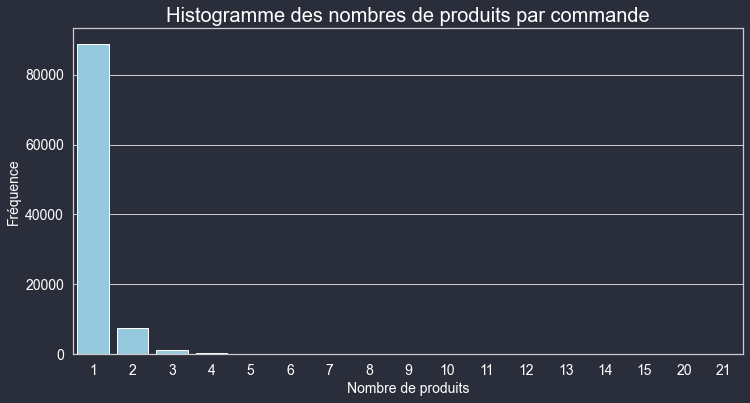

In [23]:
item_counts = aggregated_order_items['number_of_items'].value_counts()

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.barplot(x=item_counts.index, y=item_counts.values, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Nombre de produits', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Histogramme des nombres de produits par commande', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

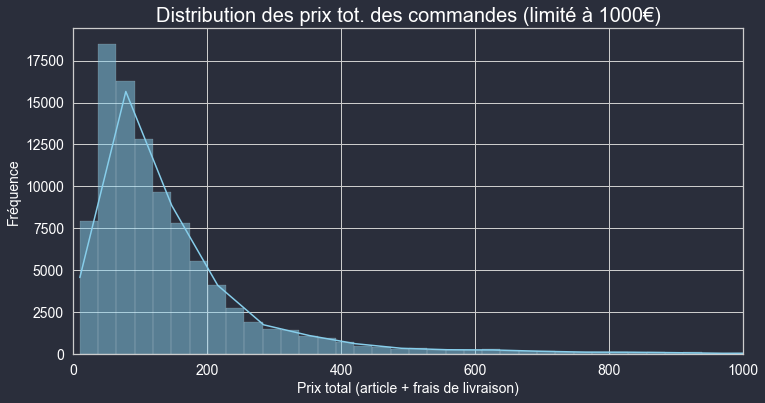

In [24]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.histplot(aggregated_order_items['total_price'], bins=500, kde=True, color='skyblue')  
plt.xlim(0, 1000) 
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Prix total (article + frais de livraison)', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution des prix tot. des commandes (limité à 1000€)', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
#plt.grid(axis='y', alpha=0.75)
plt.show()

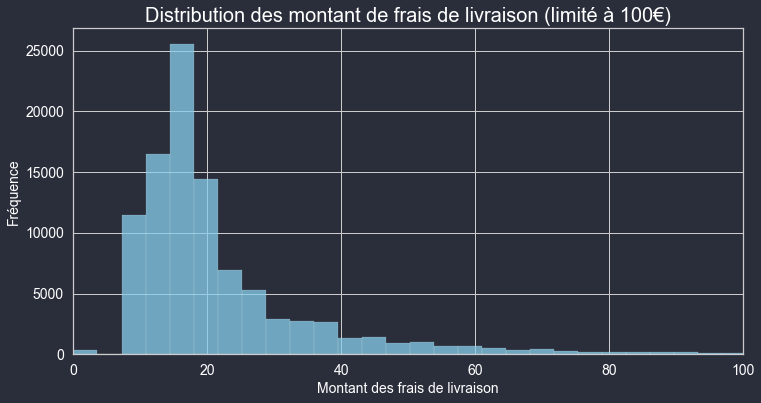

In [25]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.histplot(aggregated_order_items['freight_value'], bins=500, color='skyblue')  
plt.xlim(0, 100) 
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Montant des frais de livraison', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution des montant de frais de livraison (limité à 100€)', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
#plt.grid(axis='y', alpha=0.75)
plt.show()

## 2.4 Order payments

In [26]:
order_payments_data

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [27]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
print(order_payments_data['order_id'].nunique())

99440


Dans ce jeu de données il y a des informations sur le paiement de 99440 commandes. 

On remarque que le nombre de commandes est légèrement plus élevé que dans le jeu de données précédent. 

In [29]:
aggregated_order_payments = order_payments_data.groupby('order_id').agg(
    payment_sequential=('payment_sequential', lambda x: (x > 1).any()),  # True si une valeur est > 1
    main_payment_type=('payment_type', lambda x: x.loc[order_payments_data.loc[x.index, 'payment_value'].idxmax()]),  # Modalité avec le 'payment_value' maximal
    payment_installments=('payment_installments', 'sum'),  # Somme des 'payment_installments'
    payment_value=('payment_value', 'sum')  # Somme des 'payment_value'
).reset_index()

In [30]:
aggregated_order_payments['payment_sequential'] = aggregated_order_payments['payment_sequential'].astype(bool)

In [31]:
aggregated_order_payments

order_id  payment_sequential main_payment_type  \
0      00010242fe8c5a6d1ba2dd792cb16214               False       credit_card   
1      00018f77f2f0320c557190d7a144bdd3               False       credit_card   
2      000229ec398224ef6ca0657da4fc703e               False       credit_card   
3      00024acbcdf0a6daa1e931b038114c75               False       credit_card   
4      00042b26cf59d7ce69dfabb4e55b4fd9               False       credit_card   
...                                 ...                 ...               ...   
99435  fffc94f6ce00a00581880bf54a75a037               False            boleto   
99436  fffcd46ef2263f404302a634eb57f7eb               False            boleto   
99437  fffce4705a9662cd70adb13d4a31832d               False       credit_card   
99438  fffe18544ffabc95dfada21779c9644f               False       credit_card   
99439  fffe41c64501cc87c801fd61db3f6244               False       credit_card   

       payment_installments  payment_value  
0                         2          72.19  
1                         3         259.83  
2                         5         216.87  
3                         2          25.78  
4                         3         218.04  
...                     ...            ...  
99435                     1         343.40  
99436                     1         386.53  
99437                     3         116.85  
99438                     3          64.71  
99439                     1          55.79  

[99440 rows x 5 columns]

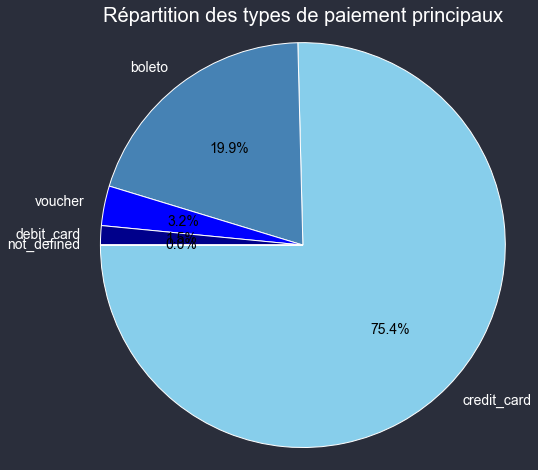

In [32]:
plt.figure(figsize=(8, 8))
main_payment_counts = aggregated_order_payments['main_payment_type'].value_counts()
plt.gca().set_facecolor(background_color)

wedges, texts, autotexts = plt.pie(main_payment_counts, 
                                    labels=main_payment_counts.index, 
                                    autopct='',  # On ne met pas encore de pourcentage
                                    startangle=180, 
                                    colors=['skyblue', 'steelblue', 'blue', 'darkblue'],
                                    textprops=dict(color='white', fontsize=14))  

for i, a in enumerate(autotexts):
    a.set_text(f'{main_payment_counts[i] / main_payment_counts.sum() * 100:.1f}%')  # Formater le pourcentage
    a.set_color('black')  # Changer la couleur des pourcentages à noir
    a.set_fontsize(14)  # Taille de la police des pourcentages

plt.title('Répartition des types de paiement principaux', fontsize=title_size, color=text_color)
plt.gcf().set_facecolor(background_color)
plt.axis('equal') 
plt.show()

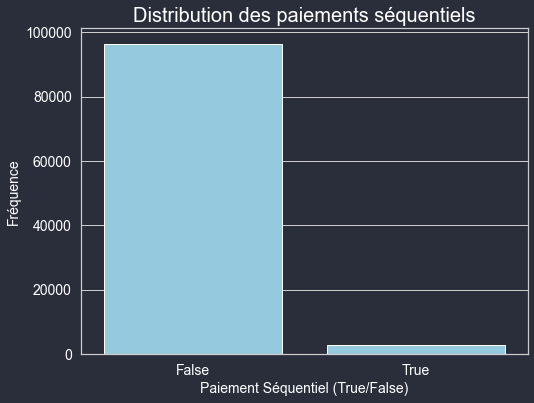

In [33]:
plt.figure(figsize=(8, 6))
payment_sequential_counts = aggregated_order_payments['payment_sequential'].value_counts()
plt.gca().set_facecolor(background_color)

sns.barplot(x=payment_sequential_counts.index.astype(str), y=payment_sequential_counts.values, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Paiement Séquentiel (True/False)', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution des paiements séquentiels', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

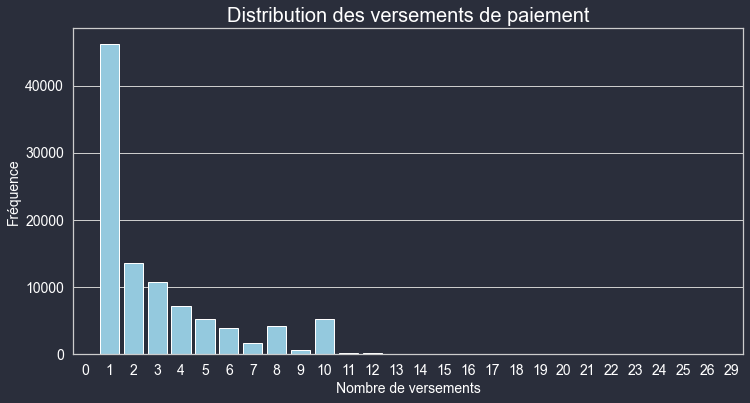

In [34]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.barplot(x=aggregated_order_payments['payment_installments'].value_counts().index, 
            y=aggregated_order_payments['payment_installments'].value_counts().values, 
            color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Nombre de versements', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution des versements de paiement', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

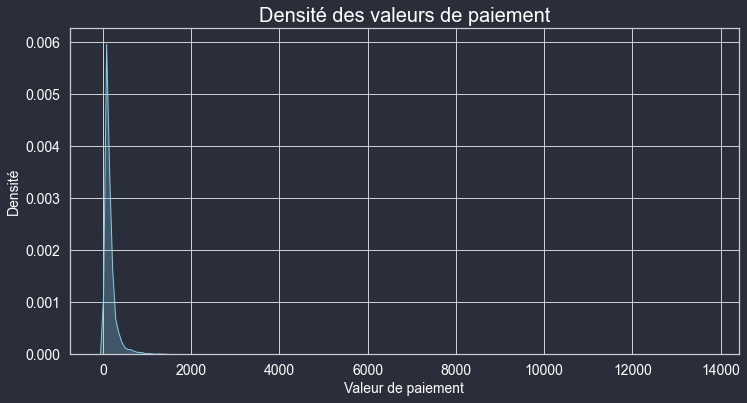

In [35]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.kdeplot(aggregated_order_payments['payment_value'], color='skyblue', fill=True)
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Valeur de paiement', fontsize=label_size, color=text_color)
plt.ylabel('Densité', fontsize=label_size, color=text_color)
plt.title('Densité des valeurs de paiement', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

## 2.5 Order reviews

In [36]:
order_reviews_data

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [37]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [38]:
order_reviews_data['review_creation_date'] = pd.to_datetime(order_reviews_data['review_creation_date'], errors='coerce')
order_reviews_data['review_answer_timestamp'] = pd.to_datetime(order_reviews_data['review_answer_timestamp'], errors='coerce')

In [39]:
order_reviews_data['review_comment'] = order_reviews_data['review_comment_message'].notnull()

In [40]:
print(order_reviews_data['review_id'].nunique())
print(order_reviews_data['order_id'].nunique())

98410
98673


In [41]:
aggregated_reviews = order_reviews_data.groupby('order_id').agg(
    number_of_review=('review_id', 'count'),  # Nombre de reviews par 'order_id'
    average_review_score=('review_score', 'mean'),  # Moyenne des scores de review
    review_comment=('review_comment', 'any'),  # True si au moins une ligne a True dans 'review_comment'
    date_first_review=('review_creation_date', 'min'),  # Date de la plus ancienne note
    date_last_review=('review_creation_date', 'max')  # Date de la plus récente note
).reset_index() 

In [42]:
aggregated_reviews

order_id  number_of_review  \
0      00010242fe8c5a6d1ba2dd792cb16214                 1   
1      00018f77f2f0320c557190d7a144bdd3                 1   
2      000229ec398224ef6ca0657da4fc703e                 1   
3      00024acbcdf0a6daa1e931b038114c75                 1   
4      00042b26cf59d7ce69dfabb4e55b4fd9                 1   
...                                 ...               ...   
98668  fffc94f6ce00a00581880bf54a75a037                 1   
98669  fffcd46ef2263f404302a634eb57f7eb                 1   
98670  fffce4705a9662cd70adb13d4a31832d                 1   
98671  fffe18544ffabc95dfada21779c9644f                 1   
98672  fffe41c64501cc87c801fd61db3f6244                 1   

       average_review_score  review_comment date_first_review date_last_review  
0                       5.0            True        2017-09-21       2017-09-21  
1                       4.0           False        2017-05-13       2017-05-13  
2                       5.0            True        2018-01-23       2018-01-23  
3                       4.0           False        2018-08-15       2018-08-15  
4                       5.0            True        2017-03-02       2017-03-02  
...                     ...             ...               ...              ...  
98668                   5.0           False        2018-05-11       2018-05-11  
98669                   5.0           False        2018-07-24       2018-07-24  
98670                   5.0           False        2017-10-29       2017-10-29  
98671                   5.0            True        2017-08-17       2017-08-17  
98672                   5.0           False        2018-06-15       2018-06-15  

[98673 rows x 6 columns]

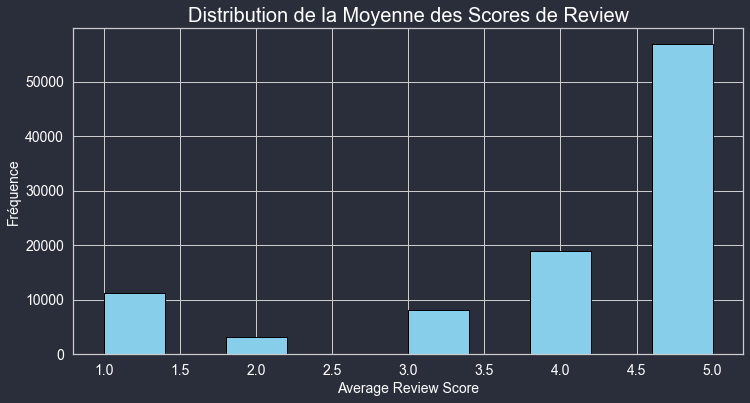

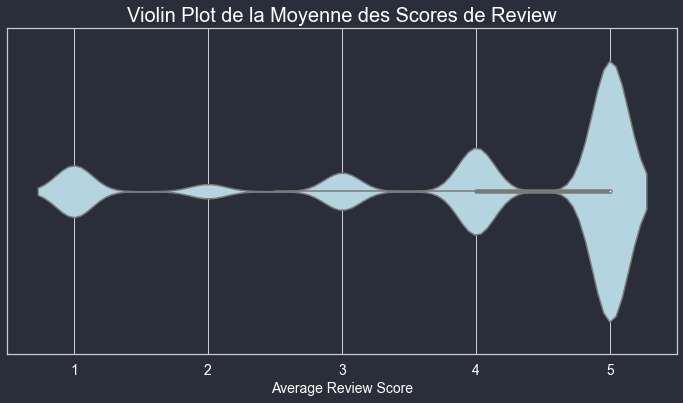

In [43]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)
plt.hist(aggregated_reviews['average_review_score'], bins=10, color='skyblue', edgecolor='black')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.title('Distribution de la Moyenne des Scores de Review', fontsize=title_size, color=text_color)
plt.xlabel('Average Review Score', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.violinplot(x=aggregated_reviews['average_review_score'], color='lightblue')
plt.title('Violin Plot de la Moyenne des Scores de Review', fontsize=title_size, color=text_color)
plt.xticks(color=text_color, fontsize=label_size)
plt.xlabel('Average Review Score', fontsize=label_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

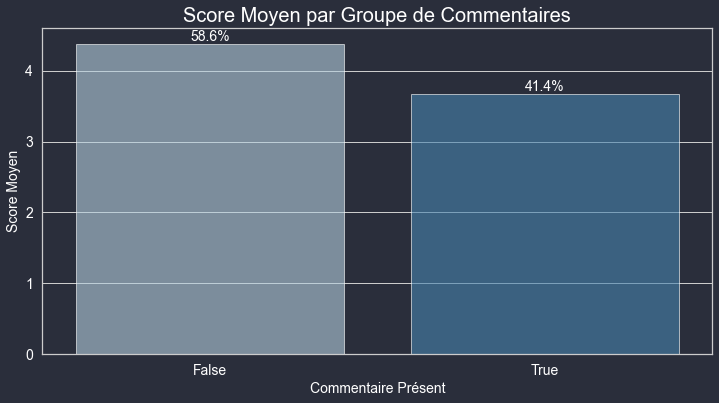

In [44]:
review_summary = aggregated_reviews.groupby('review_comment')['average_review_score'].agg(['mean', 'count']).reset_index()
review_summary.columns = ['review_comment', 'average_score', 'user_count']

review_summary['proportion'] = review_summary['user_count'] / review_summary['user_count'].sum()

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.barplot(data=review_summary, x='review_comment', y='average_score', palette='Blues', alpha=0.6)

for index, row in review_summary.iterrows():
    plt.text(index, row['average_score'], f'{row["proportion"]:.1%}', 
             color=text_color, ha='center', va='bottom', fontsize=label_size)

plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Commentaire Présent', fontsize=label_size, color=text_color)
plt.ylabel('Score Moyen', fontsize=label_size, color=text_color)
plt.title('Score Moyen par Groupe de Commentaires', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

## 2.6 Orders

In [45]:
orders_data

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [46]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [47]:
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'], errors='coerce')
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'], errors='coerce')
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'], errors='coerce')
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'], errors='coerce')
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'], errors='coerce')

In [48]:
orders_data['date'] = orders_data['order_purchase_timestamp'].dt.date

In [49]:
order_status_counts = orders_data['order_status'].value_counts()
print(order_status_counts)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


On enlève toutes les commandes annulées.

In [50]:
orders_data = orders_data.loc[orders_data['order_status'] != 'canceled']

In [51]:
orders_delivered_data = orders_data.copy()

Rajoutons maintenant des variables correspondant aux délais de livraison et à l'écart entre la date de l'estimation de la livraison et la livraison réelle. 

In [52]:
orders_delivered_data['delivery_time'] = (orders_delivered_data['order_delivered_customer_date'] - orders_delivered_data['order_purchase_timestamp']).dt.days
#orders_delivered_data['delivery_time'] = orders_delivered_data['delivery_time'].astype(int)

In [53]:
orders_delivered_data['estimates_delivery_time'] = (orders_delivered_data['order_estimated_delivery_date'] - orders_delivered_data['order_purchase_timestamp']).dt.days


In [54]:
orders_delivered_data['delivery_gap_days'] = (orders_delivered_data['order_delivered_customer_date'] - orders_delivered_data['order_estimated_delivery_date']).dt.days
#orders_delivered_data['delivery_gap_days'] = orders_delivered_data['delivery_gap_days'].astype(int)

In [55]:
orders_delivered_data.shape

(98816, 12)

In [56]:
print(orders_delivered_data['order_id'].nunique())

98816


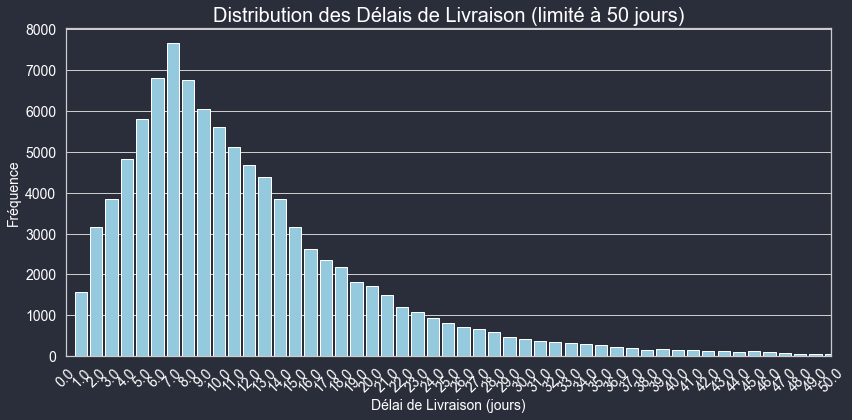

In [57]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

delivery_time_counts = orders_delivered_data['delivery_time'].value_counts().sort_index()

sns.barplot(x=delivery_time_counts.index, y=delivery_time_counts.values, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size, rotation=45)  
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Délai de Livraison (jours)', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution des Délais de Livraison (limité à 50 jours)', fontsize=title_size, color=text_color)

plt.xlim(0, 50)  # Limiter l'axe des abscisses
plt.gcf().set_facecolor(background_color)
plt.tight_layout() 
plt.show()

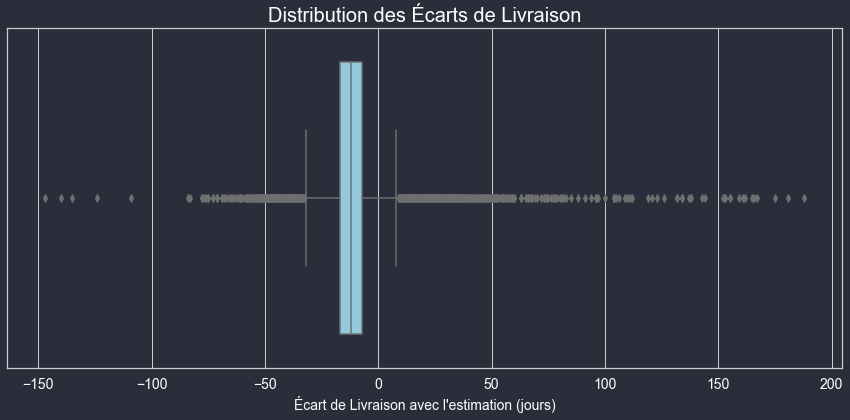

In [58]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.boxplot(data=orders_delivered_data, x='delivery_gap_days', color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Écart de Livraison avec l\'estimation (jours)', fontsize=label_size, color=text_color)
plt.title('Distribution des Écarts de Livraison', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.tight_layout() 
plt.show()

## 2.7 Products

In [59]:
products_data

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [60]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Mettons les noms des produits en anglais**

In [61]:
products_data = pd.merge(products_data, translation_data, on='product_category_name', how='left')
products_data['product_category_name'] = products_data['product_category_name_english']
products_data = products_data.drop('product_category_name_english', axis=1)

Rajoutons une variable pour le volume des produits. 

In [62]:
products_data['product_volume'] = products_data['product_length_cm'] * products_data['product_height_cm'] * products_data['product_width_cm']

In [63]:
print(products_data['product_id'].nunique())

32951


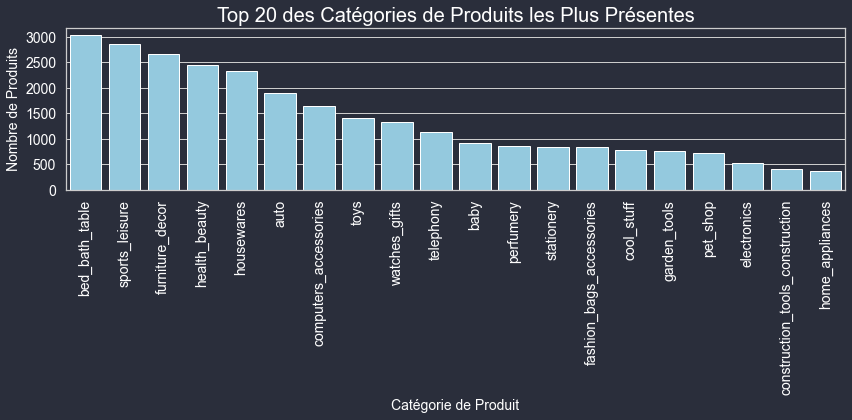

In [64]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

category_counts = products_data['product_category_name'].value_counts().head(20)  # Top 10 catégories les plus présentes

sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size, rotation=90)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Catégorie de Produit', fontsize=label_size, color=text_color)
plt.ylabel('Nombre de Produits', fontsize=label_size, color=text_color)
plt.title('Top 20 des Catégories de Produits les Plus Présentes', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.tight_layout()
plt.show()

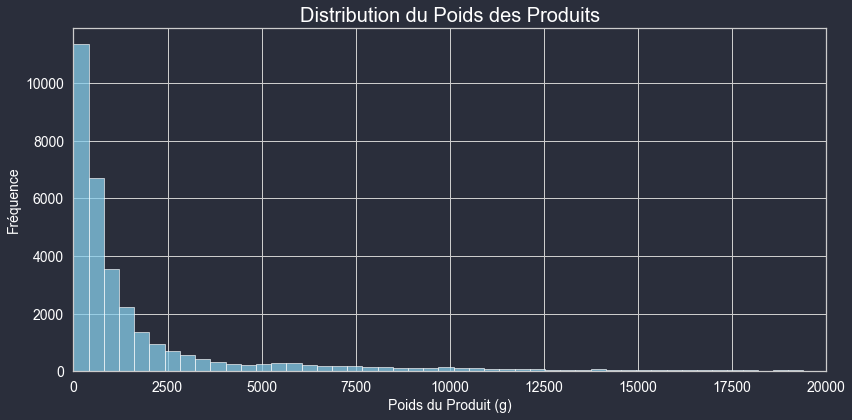

In [65]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.histplot(products_data['product_weight_g'], bins=100, color='skyblue')
plt.xlim(0, 20000) 
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Poids du Produit (g)', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution du Poids des Produits', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.tight_layout()
plt.show()

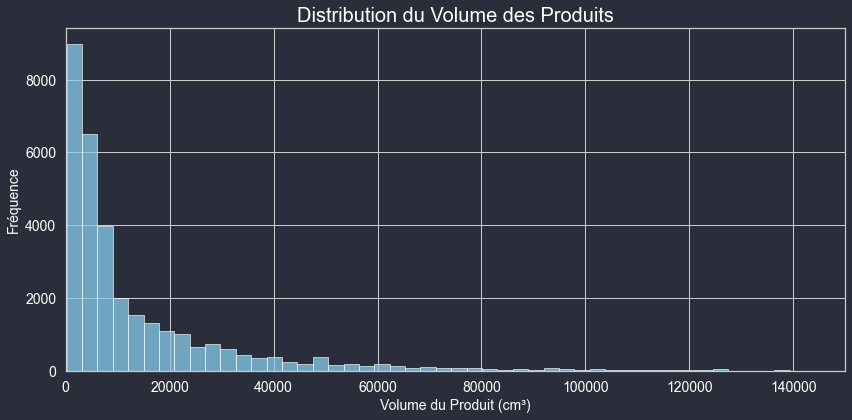

In [66]:
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.histplot(products_data['product_volume'], bins=100, color='skyblue')
plt.xlim(0, 150000) 
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Volume du Produit (cm³)', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution du Volume des Produits', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.tight_layout()
plt.show()

## 2.8 Sellers

In [67]:
sellers_data

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [68]:
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [69]:
print(sellers_data['seller_id'].nunique())

3095


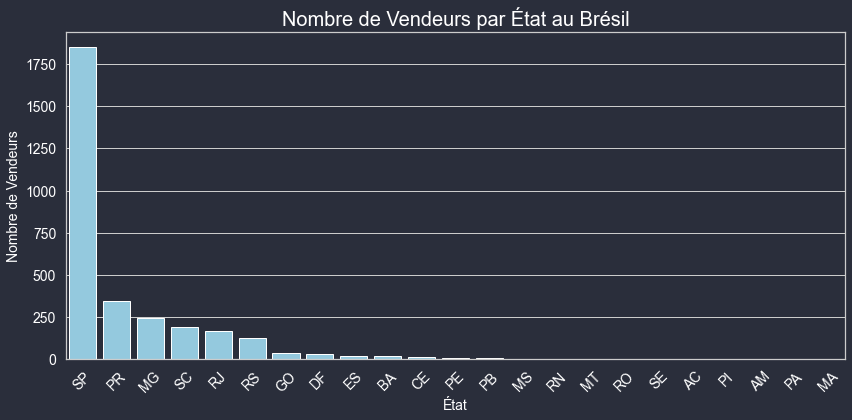

In [70]:
sellers_per_state = sellers_data['seller_state'].value_counts()

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)

sns.barplot(x=sellers_per_state.index, y=sellers_per_state.values, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size, rotation=45)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('État', fontsize=label_size, color=text_color)
plt.ylabel('Nombre de Vendeurs', fontsize=label_size, color=text_color)
plt.title('Nombre de Vendeurs par État au Brésil', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.tight_layout()
plt.show()

# 3. Regroupement des données

## Customers & Geolocation

In [71]:
customers_geolocation_data = pd.merge(customers_data, geolocation_data, left_on = 'customer_zip_code_prefix', 
                                      right_on = 'geolocation_zip_code_prefix', how = 'left')

In [72]:
customers_geolocation_data['geolocation_lat'] = pd.to_numeric(customers_geolocation_data['geolocation_lat'], errors='coerce')
customers_geolocation_data['geolocation_lng'] = pd.to_numeric(customers_geolocation_data['geolocation_lng'], errors='coerce')

In [73]:
customers_geolocation_avg = customers_geolocation_data.groupby('customer_id', as_index=False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
})

customers_geoloc_data = pd.merge(
    customers_geolocation_avg,
    customers_geolocation_data[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
).drop_duplicates()

In [74]:
customers_geoloc_data

customer_id  geolocation_lat  geolocation_lng  \
0         00012a2ce6f8dcda20d059ce98491703       -23.499063       -46.767939   
116       000161a058600d5901f007fab4c27140       -20.469754       -45.123242   
222       0001fd6190edaaf884bcaf3d49edf079       -18.706581       -40.406384   
423       0002414f95344307404f0ace7a26f1d5       -21.770599       -43.355230   
424       000379cdec625522490c315e70c7a9fb       -23.738709       -46.689333   
...                                    ...              ...              ...   
15082777  fffecc9f79fd8c764f843e9951b11341       -29.631686       -50.834574   
15082944  fffeda5b6d849fbd39689bb92087f431       -22.961345       -43.213641   
15083207  ffff42319e9b2d713724ae527742af25       -23.606135       -46.757486   
15083278  ffffa3172527f765de70084a7e53aae8       -21.427359       -45.946513   
15083563  ffffe8b65bbe3087b653a978c870db99       -23.542451       -46.812849   

                        customer_unique_id  customer_zip_code_prefix  \
0         248ffe10d632bebe4f7267f1f44844c9                      6273   
116       b0015e09bb4b6e47c52844fab5fb6638                     35550   
222       94b11d37cd61cb2994a194d11f89682b                     29830   
423       4893ad4ea28b2c5b3ddf4e82e79db9e6                     39664   
424       0b83f73b19c2019e182fd552c048a22c                      4841   
...                                    ...                       ...   
15082777  e5794df8573fa179a90a7b797fc4b71f                     95630   
15082944  afbb5a642107cf6bb1ca68e863175f03                     22461   
15083207  680213db6ebd9e4f24d03280cbe10346                      6754   
15083278  48fd7dec70f2b104a1d5e8c5c639102b                     37130   
15083563  736e6bfa0510aa5b878881a226a5fd89                      6172   

            customer_city customer_state  
0                  osasco             SP  
116           itapecerica             MG  
222          nova venecia             ES  
423              mendonca             MG  
424             sao paulo             SP  
...                   ...            ...  
15082777           parobe             RS  
15082944   rio de janeiro             RJ  
15083207  taboao da serra             SP  
15083278          alfenas             MG  
15083563           osasco             SP  

[99441 rows x 7 columns]

In [75]:
customers_geoloc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 15083563
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   geolocation_lat           99163 non-null  float64
 2   geolocation_lng           99163 non-null  float64
 3   customer_unique_id        99441 non-null  object 
 4   customer_zip_code_prefix  99441 non-null  int64  
 5   customer_city             99441 non-null  object 
 6   customer_state            99441 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


Il semble que certains zip code du jeu de données des clients n'était pas présents dans le jeu de données des localisations. Cela explique les 278 lignes avec des valeurs manquantes pour les latitudes et longitudes. 

Nous allons maintenant compléter ces valeurs de coordonnées manquantes en utilisant le nom des villes et des États associées.

In [76]:
# Créez une instance de géocodeur
geolocator = Nominatim(user_agent="geo_imputation", timeout=10)

# Fonction pour obtenir les coordonnées d'une ville et d'un état
def get_coordinates(city, state):
    try:
        location = geolocator.geocode(f"{city}, {state}")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

missing_coords = customers_geoloc_data[customers_geoloc_data['geolocation_lat'].isna()]

for index, row in missing_coords.iterrows():
    city, state = row['customer_city'], row['customer_state']
    lat, lng = get_coordinates(city, state)
    
    if lat and lng:
        customers_geoloc_data.at[index, 'geolocation_lat'] = lat
        customers_geoloc_data.at[index, 'geolocation_lng'] = lng

print(customers_geoloc_data[['geolocation_lat', 'geolocation_lng']].isna().sum())

geolocation_lat    0
geolocation_lng    0
dtype: int64


In [77]:
customers_geoloc_data.rename(columns={'geolocation_lat': 'customer_geolocation_lat', 
                                      'geolocation_lng': 'customer_geolocation_lng'}, inplace=True)

J'ai un dataframe "customers_geoloc_data" qui contient des données sur les clients d'un site de e-commerce. J'ai des variables "customer_city", "cutomer_geolocation_lat" et "cutomer_geolocation_lng" pour les villes et les coordonnées géographiques de ces clients. J'aimerai créer une carte pour avoir un visualisation de la répartition des clients dans le pays étudié. 

In [78]:
df = customers_geoloc_data.copy()  

centre_lat = df["customer_geolocation_lat"].mean()
centre_lng = df["customer_geolocation_lng"].mean()
carte = folium.Map(location=[centre_lat, centre_lng], zoom_start=6)

heat_data = [[row["customer_geolocation_lat"], row["customer_geolocation_lng"]] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(carte)

carte

## Sellers & Geolocation

In [79]:
sellers_geolocation_data = pd.merge(sellers_data, geolocation_data, left_on = 'seller_zip_code_prefix', 
                                      right_on = 'geolocation_zip_code_prefix', how = 'left')

In [80]:
sellers_geolocation_data['geolocation_lat'] = pd.to_numeric(sellers_geolocation_data['geolocation_lat'], errors='coerce')
sellers_geolocation_data['geolocation_lng'] = pd.to_numeric(sellers_geolocation_data['geolocation_lng'], errors='coerce')


In [81]:
sellers_geolocation_avg = sellers_geolocation_data.groupby('seller_id', as_index=False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
})

sellers_geoloc_data = pd.merge(
    sellers_geolocation_avg,
    sellers_geolocation_data[['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']],
    on='seller_id',
    how='left'
).drop_duplicates()

In [82]:
sellers_geoloc_data

seller_id  geolocation_lat  geolocation_lng  \
0       0015a82c2db000af6aaaf3ae2ecb0532       -23.640444       -46.541742   
352     001cca7ae9ae17fb1caed9dfb1094831       -20.278513       -40.411675   
399     001e6ad469a905060d959994f1b41e4f       -22.872355       -43.027433   
453     002100f778ceb8431b7a1020ff7ab48f       -20.528759       -47.411110   
733     003554e2dce176b5555353e4f3555ac8       -16.640574       -49.276483   
...                                  ...              ...              ...   
434026  ffcfefa19b08742c5d315f2791395ee5       -25.425730       -49.253916   
434171  ffdd9f82b9a447f6f8d4b91554cc7dd3       -25.417039       -49.260760   
434475  ffeee66ac5d5a62fe688b9d26f83f534       -20.814772       -49.506928   
434850  fffd5413c0700ac820c7069d66d98c89       -22.721605       -46.844150   
434872  ffff564a4f9085cd26170f4732393726       -22.892058       -47.082443   

        seller_zip_code_prefix  seller_city seller_state  
0                         9080  santo andre           SP  
352                      29156    cariacica           ES  
399                      24754  sao goncalo           RJ  
453                      14405       franca           SP  
733                      74565      goiania           GO  
...                        ...          ...          ...  
434026                   80045     curitiba           PR  
434171                   80030     curitiba           PR  
434475                   15130     mirassol           SP  
434850                   13908       amparo           SP  
434872                   13070     campinas           SP  

[3095 rows x 6 columns]

Encore une fois certain zip code du jeu de données des vendeurs ne sont pas présents dans celui des informations géographique ce qui signifie que quelques vendeurs n'ont pas de latitude et longitude associées.

Nous allons les compléter à l'aide des noms des villes et des États dans lesquels ils sont situés.

In [83]:
missing_coords = sellers_geoloc_data[sellers_geoloc_data['geolocation_lat'].isna()]

for index, row in missing_coords.iterrows():
    city, state = row['seller_city'], row['seller_state']
    lat, lng = get_coordinates(city, state)
    
    if lat and lng:
        sellers_geoloc_data.at[index, 'geolocation_lat'] = lat
        sellers_geoloc_data.at[index, 'geolocation_lng'] = lng

print(sellers_geoloc_data[['geolocation_lat', 'geolocation_lng']].isna().sum())

geolocation_lat    0
geolocation_lng    0
dtype: int64


In [84]:
sellers_geoloc_data.rename(columns={'geolocation_lat': 'seller_geolocation_lat', 'geolocation_lng': 'seller_geolocation_lng'}, inplace=True)

In [85]:
df = sellers_geoloc_data.copy()  

centre_lat = df["seller_geolocation_lat"].mean()
centre_lng = df["seller_geolocation_lng"].mean()
carte_seller = folium.Map(location=[centre_lat, centre_lng], zoom_start=6)

heat_data = [[row["seller_geolocation_lat"], row["seller_geolocation_lng"]] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(carte_seller)

carte_seller

## Orders & Orders payments

In [86]:
order_delivered_payments = pd.merge(orders_delivered_data, aggregated_order_payments, on= 'order_id', how= 'left')

In [87]:
order_delivered_payments

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
98811  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
98812  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
98813  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
98814  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
98815  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
98811    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
98812    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
98813    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
98814    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
98815    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
98811          2017-03-10 11:18:03           2017-03-17 15:08:01   
98812          2018-02-07 23:22:42           2018-02-28 17:37:56   
98813          2017-08-28 20:52:26           2017-09-21 11:24:17   
98814          2018-01-12 15:35:03           2018-01-25 23:32:54   
98815          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date        date  delivery_time  \
0                        2017-10-18  2017-10-02            8.0   
1                        2018-08-13  2018-07-24           13.0   
2                        2018-09-04  2018-08-08            9.0   
3                        2017-12-15  2017-11-18           13.0   
4                        2018-02-26  2018-02-13            2.0   
...                             ...         ...            ...   
98811                    2017-03-28  2017-03-09            8.0   
98812                    2018-03-02  2018-02-06           22.0   
98813                    2017-09-27  2017-08-27           24.0   
98814                    2018-02-15  2018-01-08           17.0   
98815                    2018-04-03  2018-03-08            7.0   

       estimates_delivery_time  delivery_gap_days payment_sequential  \
0                           15               -8.0               True   
1                           19               -6.0              False   
2                           26              -18.0              False   
3                           26              -13.0              False   
4                           12              -10.0              False   
...                        ...                ...                ...   
98811                       18              -11.0              False   
98812                       23               -2.0              False   
98813                       30             

## Order Items & Products

In [88]:
order_items_products = pd.merge(order_items_data, products_data, on = 'product_id', how = 'left')

In [89]:
order_items_products

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  total_price  \
0      2017-09-19 09:45:35   58.90          13.29        72.19   
1      2017-05-03 11:05:13  239.90          19.93       259.83   
2      2018-01-18 14:48:30  199.00          17.87       216.87   
3      2018-08-15 10:10:18   12.99          12.79        25.78   
4      2017-02-13 13:57:51  199.90          18.14       218.04   
...                    ...     ...            ...          ...   
112645 2018-05-02 04:11:01  299.99          43.41       343.40   
112646 2018-07-20 04:31:48  350.00          36.53       386.53   
112647 2017-10-30 17:14:25   99.90          16.95       116.85   
112648 2017-08-21 00:04:32   55.99           8.72        64.71   
112649 2018-06-12 17:10:13   43.00          12.79        55.79   

        product_category_name  product_name_lenght  \
0                  cool_stuff                 58.0   
1                    pet_shop                 56.0   
2             furniture_decor                 59.0   
3                   perfumery                 42.0   
4                garden_tools                 59.0   
...                       ...                  ...   
112645             housewares                 43.0   
112646  computers_accessories                 31.0   
112647         sports_leisure                 43.0   
112648  computers_accessories                 56.0   
112649         bed_bath_table                 47.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                            598.0                 4.0             650.0   
1                            239.0                 2.0           30000.0   
2                            695.0                 2.0            3050.0   
3                            480.0                 1.0             200.0   
4                            409.0                 1.0            3750.0   
...                            ...                 ...               ...   
112645                      1002.0                 3.0           10150.0   
112646                       232.0                 1.0            8950.0   
112647                       869.0                 1.0             967.0   
112648                      1306.0                 1.0             100.0   
112649                       511.0                 1.0             600.0   

        product_length_cm  prod

In [90]:
order_items_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   total_price                 112650 non-null  float64       
 8   product_category_name       111023 non-null  object        
 9   product_name_lenght         111047 non-null  float64       
 10  product_description_lenght  111047 non-null  float64       
 11  product_photos_qty          111047 non-

Il semble que certains produits de certaines commandes ne soients pas présents dans le jeu de données "products".

Est ce possible que pour une même commande il y ait des articles de vendeurs différents ? 

In [91]:
seller_counts = order_items_products.groupby('order_id')['seller_id'].nunique()

multiple_sellers = seller_counts[seller_counts > 1]

print(f"Nombre de 'order_id' avec plusieurs 'seller_id' : {len(multiple_sellers)}")
print("Exemples de 'order_id' avec plusieurs 'seller_id' :")
print(multiple_sellers.head())

Nombre de 'order_id' avec plusieurs 'seller_id' : 1278
Exemples de 'order_id' avec plusieurs 'seller_id' :
order_id
002f98c0f7efd42638ed6100ca699b42    2
00bcee890eba57a9767c7b5ca12d3a1b    2
01144cadcf64b6427f0a6580a3033220    2
013a98b3a668bcef05b98898177f6923    2
014405982914c2cde2796ddcf0b8703d    2
Name: seller_id, dtype: int64


La réponse est oui.

On va donc d'abord joindre le jeu de données "order_items_products" avec le jeu de données des vendeurs avant de traiter les données.

## Order Items Products & Sellers Geoloc

In [92]:
order_items_products_sellers = pd.merge(order_items_products, sellers_geoloc_data, on = "seller_id", how = "left")

In [93]:
order_items_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   total_price                 112650 non-null  float64       
 8   product_category_name       111023 non-null  object        
 9   product_name_lenght         111047 non-null  float64       
 10  product_description_lenght  111047 non-null  float64       
 11  product_photos_qty          111047 non-

In [94]:
order_items_products_sellers_agg = (
    order_items_products_sellers
    .groupby("order_id")
    .agg(
        number_of_products=("product_id", "nunique"),
        number_of_sellers=("seller_id", "nunique"),
        total_freight_value=("freight_value", "sum"),
        total_price=("total_price", "sum"),
        main_product_category_name=("product_category_name", lambda x: x.mode()[0] if not x.mode().empty else None),
        average_products_weight_g=("product_weight_g", "mean"),
        average_product_volume=("product_volume", "mean"),
        main_seller_zip_code_prefix=("seller_zip_code_prefix", lambda x: x.mode()[0] if not x.mode().empty else None),
        main_seller_city=("seller_city", lambda x: x.mode()[0] if not x.mode().empty else None),
        main_seller_state=("seller_state", lambda x: x.mode()[0] if not x.mode().empty else None)
    )
    .reset_index()
)

In [95]:
order_items_products_sellers_agg

order_id  number_of_products  \
0      00010242fe8c5a6d1ba2dd792cb16214                   1   
1      00018f77f2f0320c557190d7a144bdd3                   1   
2      000229ec398224ef6ca0657da4fc703e                   1   
3      00024acbcdf0a6daa1e931b038114c75                   1   
4      00042b26cf59d7ce69dfabb4e55b4fd9                   1   
...                                 ...                 ...   
98661  fffc94f6ce00a00581880bf54a75a037                   1   
98662  fffcd46ef2263f404302a634eb57f7eb                   1   
98663  fffce4705a9662cd70adb13d4a31832d                   1   
98664  fffe18544ffabc95dfada21779c9644f                   1   
98665  fffe41c64501cc87c801fd61db3f6244                   1   

       number_of_sellers  total_freight_value  total_price  \
0                      1                13.29        72.19   
1                      1                19.93       259.83   
2                      1                17.87       216.87   
3                      1                12.79        25.78   
4                      1                18.14       218.04   
...                  ...                  ...          ...   
98661                  1                43.41       343.40   
98662                  1                36.53       386.53   
98663                  1                16.95       116.85   
98664                  1                 8.72        64.71   
98665                  1                12.79        55.79   

      main_product_category_name  average_products_weight_g  \
0                     cool_stuff                      650.0   
1                       pet_shop                    30000.0   
2                furniture_decor                     3050.0   
3                      perfumery                      200.0   
4                   garden_tools                     3750.0   
...                          ...                        ...   
98661                 housewares                    10150.0   
98662      computers_accessories                     8950.0   
98663             sports_leisure                      967.0   
98664      computers_accessories                      100.0   
98665             bed_bath_table                      600.0   

       average_product_volume  main_seller_zip_code_prefix main_seller_city  \
0                      3528.0                        27277    volta redonda   
1                     60000.0                         3471        sao paulo   
2                     14157.0                        37564    borda da mata   
3                      2400.0                        14403           franca   
4                     42000.0                        87900           loanda   
...                       ...                          ...              ...   
98661                 53400.0                        88303           itajai   
98662                 44460.0                         1206        sao paulo   
98663                  9576.0                        80610         curitiba   
98664                  8000.0                         4733        sao paulo   
98665                  1710.0                        14940         ibitinga   

      main_seller_state  
0                    SP  
1                    SP  
2                    MG  
3                    SP  
4                    PR  
...                 ...  
98661                SC  
98662                SP  
98663                PR  
98664                SP  
98665                SP  

[98666 rows x 11 columns]

## Orders final

In [96]:
orders_1 = pd.merge(order_delivered_payments, order_items_products_sellers_agg, on = 'order_id', how='left')
orders = pd.merge(orders_1, aggregated_reviews, on = 'order_id', how='left')

In [97]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
98811  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
98812  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
98813  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
98814  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
98815  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
98811    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
98812    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
98813    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
98814    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
98815    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
98811          2017-03-10 11:18:03           2017-03-17 15:08:01   
98812          2018-02-07 23:22:42           2018-02-28 17:37:56   
98813          2017-08-28 20:52:26           2017-09-21 11:24:17   
98814          2018-01-12 15:35:03           2018-01-25 23:32:54   
98815          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date        date  delivery_time  ...  \
0                        2017-10-18  2017-10-02            8.0  ...   
1                        2018-08-13  2018-07-24           13.0  ...   
2                        2018-09-04  2018-08-08            9.0  ...   
3                        2017-12-15  2017-11-18           13.0  ...   
4                        2018-02-26  2018-02-13            2.0  ...   
...                             ...         ...            ...  ...   
98811                    2017-03-28  2017-03-09            8.0  ...   
98812                    2018-03-02  2018-02-06           22.0  ...   
98813                    2017-09-27  2017-08-27           24.0  ...   
98814                    2018-02-15  2018-01-08           17.0  ...   
98815                    2018-04-03  2018-03-08            7.0  ...   

       average_products_weight_g  average_product_volume  \
0                          500.0                  1976.0   
1                          400.0                  4693.0   
2                          420.0                  9576.0   
3                          450.0                  6000.0   
4                          250.0                 11475.0   
...                          ...                     ...   
98811                     1175.0                  5148.0   
98812                     4950.0                 16000.0   
98813                    13300.0                 63360.0   
98814                     6550.

### Nettoyage du jeu de données "orders"

In [98]:
orders = orders.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'date_first_review', 'date_last_review', 'payment_value'], axis=1)


In [99]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98816 entries, 0 to 98815
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   order_id                     98816 non-null  object        
 1   customer_id                  98816 non-null  object        
 2   order_status                 98816 non-null  object        
 3   order_purchase_timestamp     98816 non-null  datetime64[ns]
 4   date                         98816 non-null  object        
 5   delivery_time                96470 non-null  float64       
 6   estimates_delivery_time      98816 non-null  int64         
 7   delivery_gap_days            96470 non-null  float64       
 8   payment_sequential           98815 non-null  object        
 9   main_payment_type            98815 non-null  object        
 10  payment_installments         98815 non-null  float64       
 11  number_of_products           98205 non-nu

Il y a 748 lignes où les variables number_of_review, average_review_score et review_comment sont manquantes car ce sont des commandes qui n'étaient pas présentes dans le jeu de données initial des avis. 

In [100]:
orders['number_of_review'].fillna(0, inplace=True)
orders['review_comment'] = orders['review_comment'].fillna(False)
orders['review_comment'] = orders['review_comment'].astype(bool)

In [101]:
orders['payment_sequential'] = orders['payment_sequential'].astype(bool)

In [102]:
orders['delivery_time'] = orders['delivery_time'].fillna(orders['estimates_delivery_time'])
orders = orders.drop(['estimates_delivery_time'], axis = 1)

In [103]:
# une seule ligne manquante pour les paiements donc on l'enlève
orders.dropna(subset = ['payment_sequential'], inplace=True)

In [104]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98816 entries, 0 to 98815
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   order_id                     98816 non-null  object        
 1   customer_id                  98816 non-null  object        
 2   order_status                 98816 non-null  object        
 3   order_purchase_timestamp     98816 non-null  datetime64[ns]
 4   date                         98816 non-null  object        
 5   delivery_time                98816 non-null  float64       
 6   delivery_gap_days            96470 non-null  float64       
 7   payment_sequential           98816 non-null  bool          
 8   main_payment_type            98815 non-null  object        
 9   payment_installments         98815 non-null  float64       
 10  number_of_products           98205 non-null  float64       
 11  number_of_sellers            98205 non-nu

Il y a 611 commandes qui n'ont pas d'information sur le/les produit(s) car les id des commandes ne sont pas présents dans le jeu de données initial "order_items". 

Après vérification il s'agit de commandes qui n'ont pas abouties mais n'ont pas encore été annulées/ remboursées. Pour le moment gardons ces commandes.

## Customers

In [105]:
customers_1 = pd.merge(customers_geoloc_data, orders, on = 'customer_id', how = 'left')

### RFM features

In [106]:
date_reference = customers_1["order_purchase_timestamp"].max()

rfm_data = (
    customers_1
    .groupby("customer_unique_id")
    .agg(
        number_of_orders=("order_id", "nunique"),
        total_price=("total_price", "sum"),
        time_since_last_order=("order_purchase_timestamp", lambda x: (date_reference - x.max()).days)
            )
    .reset_index()
)

In [107]:
rfm_data = rfm_data.dropna(subset=['time_since_last_order'])

In [108]:
rfm_data

customer_unique_id  number_of_orders  total_price  \
0      0000366f3b9a7992bf8c76cfdf3221e2                 1       141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                 1        27.19   
2      0000f46a3911fa3c0805444483337064                 1        86.22   
3      0000f6ccb0745a6a4b88665a16c9f078                 1        43.62   
4      0004aac84e0df4da2b147fca70cf8255                 1       196.89   
...                                 ...               ...          ...   
96091  fffcf5a5ff07b0908bd4e2dbc735a684                 1      2067.42   
96092  fffea47cd6d3cc0a88bd621562a9d061                 1        84.58   
96093  ffff371b4d645b6ecea244b27531430a                 1       112.46   
96094  ffff5962728ec6157033ef9805bacc48                 1       133.69   
96095  ffffd2657e2aad2907e67c3e9daecbeb                 1        71.56   

       time_since_last_order  
0                      115.0  
1                      118.0  
2                      541.0  
3                      325.0  
4                      292.0  
...                      ...  
96091                  451.0  
96092                  266.0  
96093                  572.0  
96094                  123.0  
96095                  488.0  

[95560 rows x 4 columns]

In [109]:
rfm_data = rfm_data[(rfm_data['total_price'] <= 10000) & (rfm_data['number_of_orders'] <= 10)]

In [110]:
rfm_data.to_csv('rfm_data.csv', index=False)

### Nettoyage du jeu de données "customers"

Pour chaque clients : 

- "customer_unique_id" : l'identifiant unique du client

- "customer_zip_code_prefix" : le code postal du client

- "number_of_orders" : nombre de commandes passées 

- "total_price" : prix total dépensé par le client

- "time_since_last_order" : dtemps depuis la dernière commande (en prennant en compte la date la plus récente du jeu de données)

- "number_of_products" : nombre total de produits achetés

- "average_number_products_per_order" : nombre moyen de produits par commande

- "average_price_per_order" : prix moyen par commande

- "main_payment_type" : moyen de paiement favoris

- "average_payment_installments" : nombre de paiements moyen par commandes

- "average_delivery_time" : délais moyen de livraison 

- "delayed" : retard sur le délais de livraison estimé (0 si non, 1 si oui)

- "main_product_category_name" : la catégorie de produit la plus commandée 

- "average_products_weight_g" : le poids moyen des produits 

- "average_product_volume" : le volume moyen des produits

- "number_of_review" : nombre total d'avis

- "average_review_score" : moyenne des notes données

- "review_comment" : le client a déjà laissé un commentaire (T/F)

- "number_of_sellers" : nombre de vendeurs chez qui le client à acheté

In [111]:
date_reference = customers_1["order_purchase_timestamp"].max()

customers = (
    customers_1
    .groupby("customer_unique_id")
    .agg(
        customer_zip_code_prefix=("customer_zip_code_prefix", "first"),
        number_of_orders=("order_id", "nunique"),
        total_price=("total_price", "sum"),
        time_since_last_order=("order_purchase_timestamp", lambda x: (date_reference - x.max()).days),
        number_of_products=("number_of_products", "sum"),
        average_number_products_per_order=("number_of_products", "mean"),
        average_price_per_order=("total_price", "mean"),
        main_payment_type=("main_payment_type", lambda x: x.mode()[0] if not x.mode().empty else None),
        average_payment_installments=("payment_installments", "mean"),
        average_delivery_time=("delivery_time", "mean"),
        average_delivery_gap_day=("delivery_gap_days", "mean"),
        average_products_weight_g=("average_products_weight_g", "mean"),
        average_product_volume=("average_product_volume", "mean"),
        number_of_review=("number_of_review", "sum"),
        average_review_score=("average_review_score", "mean"),
        review_comment=("review_comment", "any"),
        number_of_sellers=("number_of_sellers", "sum")
    )
    .reset_index()
)

In [112]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_unique_id                 96096 non-null  object 
 1   customer_zip_code_prefix           96096 non-null  int64  
 2   number_of_orders                   96096 non-null  int64  
 3   total_price                        96096 non-null  float64
 4   time_since_last_order              95560 non-null  float64
 5   number_of_products                 96096 non-null  float64
 6   average_number_products_per_order  94989 non-null  float64
 7   average_price_per_order            94989 non-null  float64
 8   main_payment_type                  95559 non-null  object 
 9   average_payment_installments       95559 non-null  float64
 10  average_delivery_time              95560 non-null  float64
 11  average_delivery_gap_day           93350 non-null  flo

In [113]:
customers = customers.dropna(subset=['time_since_last_order', 'average_number_products_per_order',
                                     'average_delivery_gap_day', 'main_payment_type'])

In [114]:
customers['average_review_score'].fillna(-1, inplace=True)

In [115]:
customers['average_products_weight_g'].fillna(customers['average_products_weight_g'].mean(), inplace=True)
customers['average_product_volume'].fillna(customers['average_product_volume'].mean(), inplace=True)

In [116]:
customers = customers[(customers['total_price'] <= 10000) & (customers['number_of_orders'] <= 10)]

In [117]:
customers['delayed'] = customers['average_delivery_gap_day'].apply(lambda x: 1 if x > 0 else 0)
customers['review_comment'] = customers['review_comment'].apply(lambda x: 1 if x else 0)

customers = customers.drop('average_delivery_gap_day', axis=1)

In [118]:
customers.to_csv('customers.csv', index=False)

On va également créer un jeu de données "customers_ari.csv" qui contient une variable supplémentaire - la date - qui nous permettra d'établir la maintenance de notre modèle.

In [119]:
date_reference = customers_1["order_purchase_timestamp"].max()

customers_ari = (
    customers_1
    .groupby(["customer_unique_id", "date"])
    .agg(
        customer_zip_code_prefix=("customer_zip_code_prefix", "first"),
        number_of_orders=("order_id", "nunique"),
        total_price=("total_price", "sum"),
        time_since_last_order=("order_purchase_timestamp", lambda x: (date_reference - x.max()).days),
        number_of_products=("number_of_products", "sum"),
        average_number_products_per_order=("number_of_products", "mean"),
        average_price_per_order=("total_price", "mean"),
        main_payment_type=("main_payment_type", lambda x: x.mode()[0] if not x.mode().empty else None),
        average_payment_installments=("payment_installments", "mean"),
        average_delivery_time=("delivery_time", "mean"),
        average_delivery_gap_day=("delivery_gap_days", "mean"),
        average_products_weight_g=("average_products_weight_g", "mean"),
        average_product_volume=("average_product_volume", "mean"),
        number_of_review=("number_of_review", "sum"),
        average_review_score=("average_review_score", "mean"),
        review_comment=("review_comment", "any"),
        number_of_sellers=("number_of_sellers", "sum")
    )
    .reset_index()
)

In [120]:
customers_ari = customers_ari.dropna(subset=['average_number_products_per_order', 'average_price_per_order',
                                     'average_delivery_gap_day', 'main_payment_type', 'average_products_weight_g'])

In [121]:
customers_ari['average_review_score'].fillna(-1, inplace=True)

In [122]:
customers_ari['delayed'] = customers_ari['average_delivery_gap_day'].apply(lambda x: 1 if x > 0 else 0)
customers_ari['review_comment'] = customers_ari['review_comment'].apply(lambda x: 1 if x else 0)

customers_ari = customers_ari.drop('average_delivery_gap_day', axis=1)

In [123]:
customers_ari.to_csv('customers_ari.csv', index=False)

# 4. Analyse descriptive du jeu de données des utilisateurs

- **Matrice de corrélation**

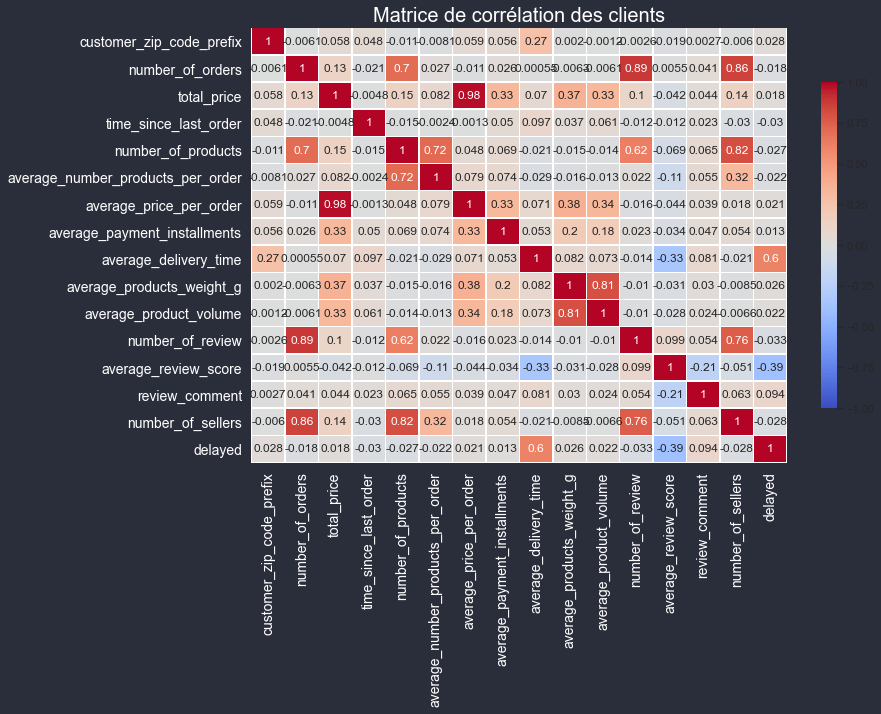

In [124]:
correlation_matrix = customers.corr()

plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": 0.75}, linewidths=0.5)

plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.title('Matrice de corrélation des clients', fontsize=title_size, color=text_color)

plt.gcf().set_facecolor(background_color)
plt.show()

- **Analyse univariée**

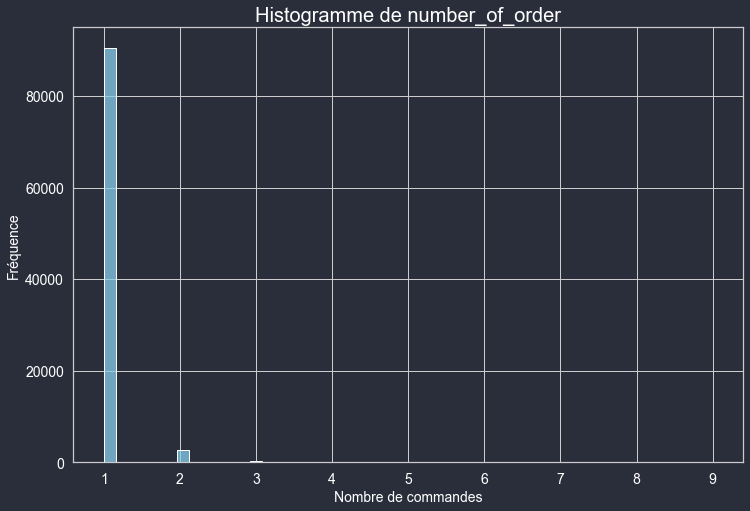

In [125]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)
sns.histplot(customers['number_of_orders'], bins=50, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Nombre de commandes', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Histogramme de number_of_order', fontsize=title_size, color=text_color)
plt.gcf().set_facecolor(background_color)
plt.show()

In [126]:
customers['number_of_orders'].value_counts()

1    90436
2     2676
3      187
4       30
5        8
6        6
7        3
9        1
Name: number_of_orders, dtype: int64

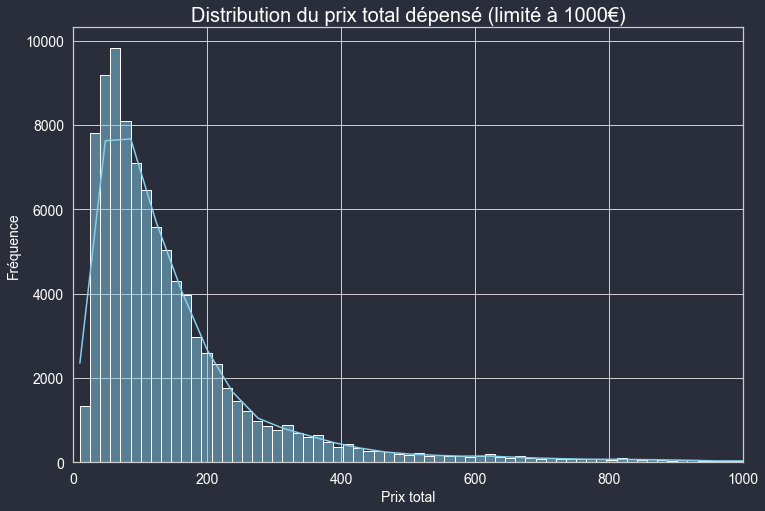

In [127]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)

plt.xlim(0, 1000) 
sns.histplot(customers['total_price'], bins=500, kde=True, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Prix total', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution du prix total dépensé (limité à 1000€)', fontsize=title_size, color=text_color)
plt.gcf().set_facecolor(background_color)
plt.show()

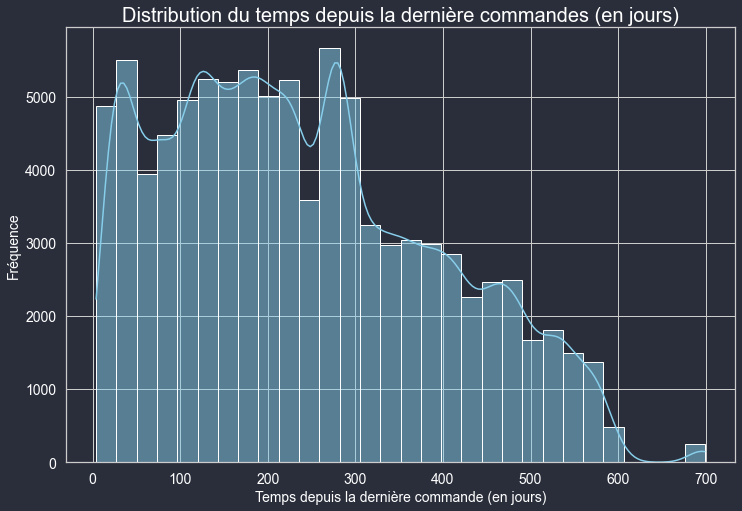

In [128]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)
sns.histplot(customers['time_since_last_order'], bins=30, kde=True, color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Temps depuis la dernière commande (en jours)', fontsize=label_size, color=text_color)
plt.ylabel('Fréquence', fontsize=label_size, color=text_color)
plt.title('Distribution du temps depuis la dernière commandes (en jours)', fontsize=title_size, color=text_color)
plt.gcf().set_facecolor(background_color)
plt.show()

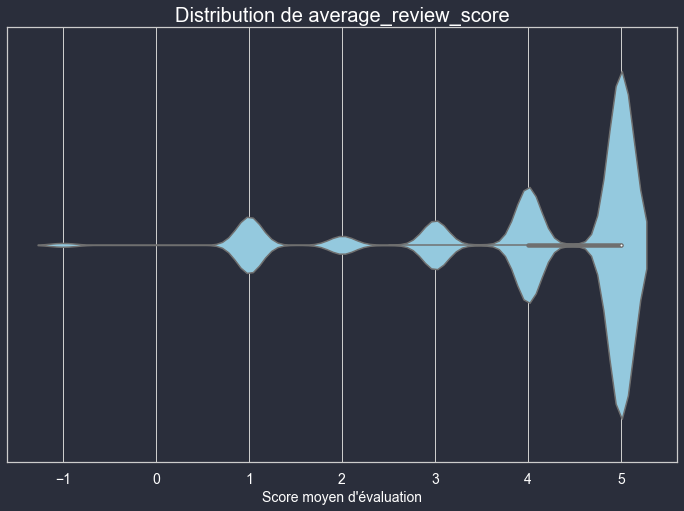

In [129]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)
sns.violinplot(data=customers, x='average_review_score', color='skyblue')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel('Score moyen d\'évaluation', fontsize=label_size, color=text_color)
plt.title('Distribution de average_review_score', fontsize=title_size, color=text_color)
plt.gcf().set_facecolor(background_color)
plt.show()

- **Analyse bivariée**

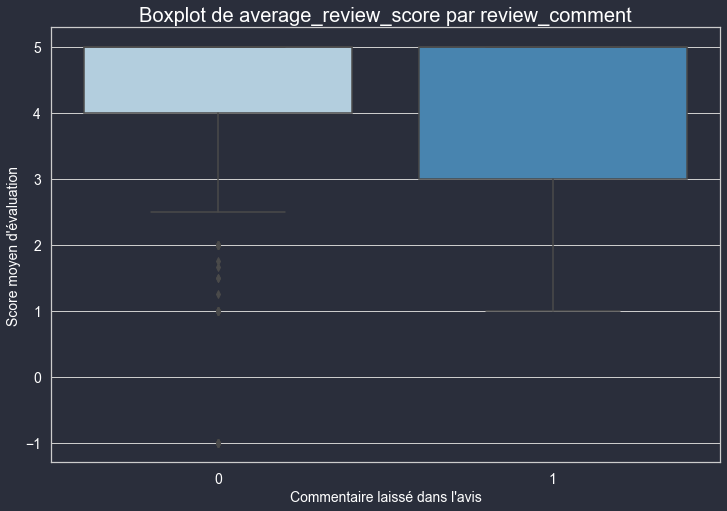

In [130]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(background_color)
sns.boxplot(x='review_comment', y='average_review_score', data=customers, palette='Blues')
plt.xticks(color=text_color, fontsize=label_size)
plt.yticks(color=text_color, fontsize=label_size)
plt.xlabel("Commentaire laissé dans l'avis", fontsize=label_size, color=text_color)
plt.ylabel('Score moyen d\'évaluation', fontsize=label_size, color=text_color)
plt.title('Boxplot de average_review_score par review_comment', fontsize=title_size, color=text_color)
plt.gcf().set_facecolor(background_color)
plt.show()

In [131]:
group1 = customers[customers['review_comment'] == 0]['average_review_score'].dropna()
group2 = customers[customers['review_comment'] == 1]['average_review_score'].dropna()

if len(group1) >= 2 and len(group2) >= 2:
    # Test de Mann-Whitney U car hypothèse de normailté non respectée
    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Test de Mann-Whitney U :")
    print(f"U-statistique = {u_stat:.4f}, p-value = {p_value:.4f}")
    
    if p_value < 0.05:
        print("Il existe une différence statistiquement significative entre les deux groupes.")
    else:
        print("Aucune différence statistiquement significative entre les deux groupes.")
else:
    print("Les groupes contiennent trop peu de données pour effectuer un test statistique.")

Test de Mann-Whitney U :
U-statistique = 1237770017.0000, p-value = 0.0000
Il existe une différence statistiquement significative entre les deux groupes.
